In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib.colors as colors
plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c = const.physical_constants['speed of light in vacuum'][0]
e = const.physical_constants['elementary charge'][0]
from numpy import ndarray

In [5]:
data = np.load('AcceleratingGradient.npy').item()
for name in data: print(name)
# Get the spreads into a 1D array
spread = np.concatenate((ndarray.flatten(data['spread1.34e16']), 
                         ndarray.flatten(data['spread2.6e16']),
                         ndarray.flatten(data['spread5e16'])))

TR = -np.concatenate((ndarray.flatten(data['gradient1.34e16'])/data['DriveGrad'][10], 
                     ndarray.flatten(data['gradient2.6e16'])/data['DriveGrad'][12],
                     ndarray.flatten(data['gradient5e16'])/data['DriveGrad'][14]))

print(data['Density'][10], data['Density'][12], data['Density'][14])
N134 = len(data['delay1.34e16'])
N26 = len(data['delay2.6e16'])
N5 = len(data['delay5e16'])
sz = data['sigmaz']
sigmaz = np.concatenate((sz[0]*np.ones(N134), sz[1]*np.ones(N134), sz[2]*np.ones(N134),
                         sz[0]*np.ones(N26), sz[1]*np.ones(N26), sz[2]*np.ones(N26),
                         sz[0]*np.ones(N5), sz[1]*np.ones(N5), sz[2]*np.ones(N5)))
delay = np.concatenate((data['delay1.34e16'], data['delay1.34e16'], data['delay1.34e16'],
                        data['delay2.6e16'], data['delay2.6e16'], data['delay2.6e16'],
                        data['delay5e16'], data['delay5e16'], data['delay5e16']))

Density
DriveGrad
sigmaz
delay5e16
gradient5e16
spread5e16
delay1.34e16
gradient1.34e16
spread1.34e16
delay2.6e16
gradient2.6e16
spread2.6e16
1.34e+16 2.59e+16 5e+16
[220 230 240 250 270 220 230 240 250 270 220 230 240 250 270 150 160 170
 180 185 190 150 160 170 180 185 190 150 160 170 180 185 190 125 135 140
 145 150 155 125 135 140 145 150 155 125 135 140 145 150 155]
[  5.2   5.2   5.2   5.2   5.2   7.8   7.8   7.8   7.8   7.8  10.4  10.4
  10.4  10.4  10.4   5.2   5.2   5.2   5.2   5.2   5.2   7.8   7.8   7.8
   7.8   7.8   7.8  10.4  10.4  10.4  10.4  10.4  10.4   5.2   5.2   5.2
   5.2   5.2   5.2   7.8   7.8   7.8   7.8   7.8   7.8  10.4  10.4  10.4
  10.4  10.4  10.4]


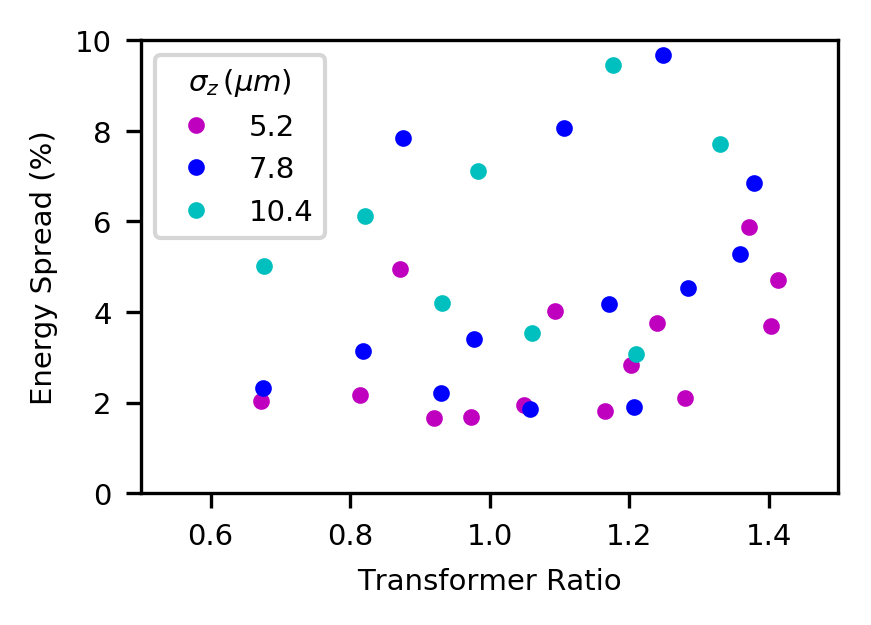

In [22]:
plt.figure(figsize=(3,2), dpi=300)
sel = np.array(sigmaz==5.2)
plt.plot(TR[sel], spread[sel], 'm.')
sel = np.array(sigmaz==7.8)
plt.plot(TR[sel], spread[sel], 'b.')
sel = np.array(sigmaz==10.4)
plt.plot(TR[sel], spread[sel], 'c.')
plt.xlabel('Transformer Ratio')
plt.ylabel('Energy Spread (%)')
plt.legend(['5.2', '7.8', '10.4'], title=r'$\sigma_z\,(\mu m)$')
plt.xlim(0.5, 1.5)
plt.ylim(0, 10)
plt.show()

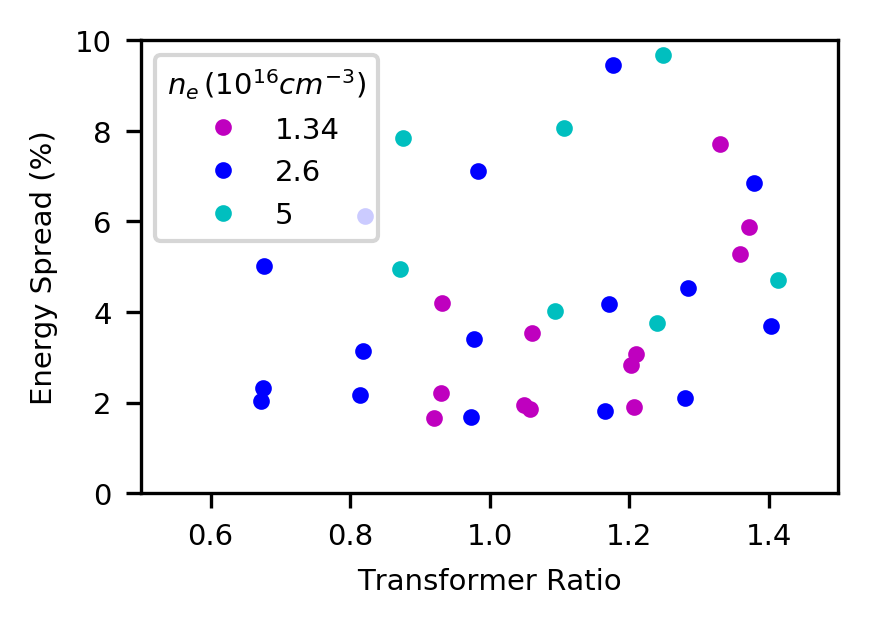

In [28]:
plt.figure(figsize=(3,2), dpi=300)
plt.plot(TR[:3*N134], spread[:3*N134], 'm.')
plt.plot(TR[3*N134:3*(N134+N26)], spread[3*N134:3*(N134+N26)], 'b.')
plt.plot(TR[3*(N134+N26):], spread[3*(N134+N26):], 'c.')
plt.xlabel('Transformer Ratio')
plt.ylabel('Energy Spread (%)')
plt.legend(['1.34', '2.6', '5'], title=r'$n_{e}\,(10^{16}cm^{-3})$')
plt.xlim(0.5, 1.5)
plt.ylim(0, 10)
plt.show()